# **Automatidata project**
**Go Beyond the Numbers: Translate Data into Insights**


Luana Rodriquez, the senior data analyst at Automatidata, requests assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month.


# Exploratory data analysis

In this activity, I will examine data provided and prepare it for analysis. I will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs. 

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. My mission is to continue the investigation and perform further EDA on this data with the aim of learning more about the variables. 
  
**The goal** is to clean data set and create a visualization.
<br/>  
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

# Visualize a story in Tableau and Python

Throughout these project notebooks, I'll follow the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=center>

## PACE: Plan 

In this stage, we need to think about the following questions where applicable:

1. Identify any outliers; What methods are best for identifying outliers?
    * Use numpy functions to investigate the `mean()` and `median()` of the data and understand range of data values
    * Use a boxplot to visualize the distribution of the data
    * Use histograms to visualize the distribution of the data
    * How do we make the decision to keep or exclude outliers from any future models?

    
There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether we keep outliers as they are, delete them, or reassign values is a decision that we make taking into account the nature of the outlying data and the assumptions of the model we am building. We start with these general guidelines:

- Delete them: In case we are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then we are more likely to decide to delete outliers. Of the three choices, we’ll use this one the least.
- Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, we are more likely to choose a path of deriving new values to replace the outlier values.
- Leave them: For a dataset that we plan to do EDA/analysis on and nothing else, or for a dataset we are preparing for a model that is resistant to outliers, it is most likely that we are going to leave them in.


### Imports, links, and loading

For EDA of the data, we import the data and packages that would be most helpful, such as pandas, numpy and matplotlib. 
Then, load the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 

In [2]:
df=pd.read_csv('data/2017_Yellow_Taxi_Trip_Data.csv')

<img src="images/Analyze.png" width="100" height="100" align=center>

## PACE: Analyze 
### Data exploration and cleaning

The first step is to assess the data. We need to check the Data Source page on Tableau Public, https://public.tableau.com/s/, to get a sense of the size, shape and makeup of the data set. Then We have to find answer to these questions: 

Given our scenario, which data columns are most applicable? 
- Which data columns can I eliminate, knowing they won’t solve our problem scenario? 
- What do we do about missing data (if any)? 
- Are there data outliers?  
- What do the distributions of our variables tell us about the question we're asking or the problem we're trying to solve?
<br>Let's start by discovering, using shape, head and size. 

In [9]:
df.shape

(22699, 18)

In [3]:
df.head()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [5]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

**Note:** According to the results from the `info()` method, there is no missing data.
### Assess whether dimensions and measures are correct
We double check the data types for the applicable columns on the data source page in Tableau, paying close attention to the dimensions and measures to ensure they are correct. 

In Python, we consider the data types of the columns to make sure they make sense.


<img src="images/Construct.png" width="100" height="100" align=center>

## PACE: Construct 
### Data visualization

We’ve assessed the data, and decided on which data variables are most applicable. It’s time to plot our visualization(s)!
Let's perform a check for outliers on relevant columns such as trip distance and trip duration. Some of the best ways to identify the presence of outliers in data are box plots and histograms. 

**Note:** Before that, we have to to convert our date columns to datetime in order to derive total trip duration.  

In [4]:
# Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

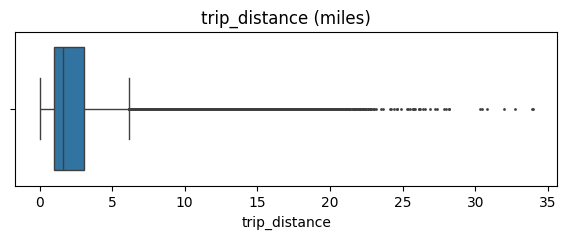

In [5]:
# Create box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('trip_distance (miles)')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

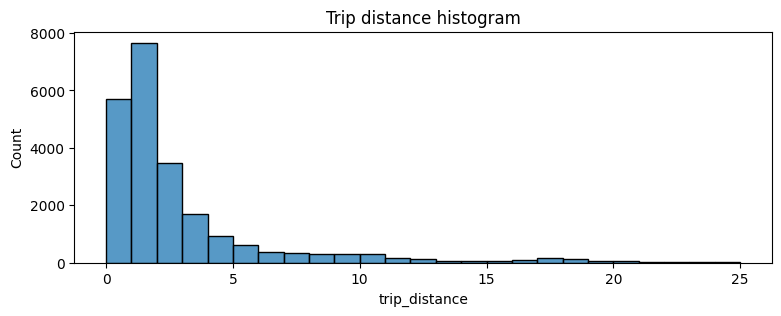

In [7]:
# Create histogram of trip_distance
plt.figure(figsize=(9,3))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

In [8]:
short_trips = round(df[df['trip_distance']<=3].shape[0]*100/df.shape[0],2)
print(f"Percent of trips shorter than 3 miles: {short_trips}")

Percent of trips shorter than 3 miles: 74.7


**Note:** 75% of trips were journeys of less than three miles. The number of trips falls away steeply as the distance traveled increases beyond three miles.

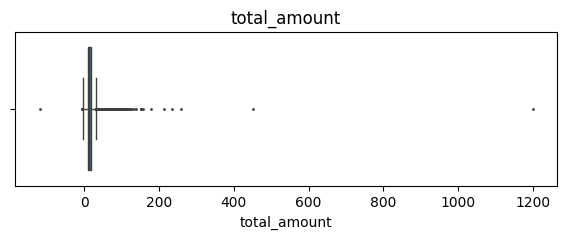

In [9]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

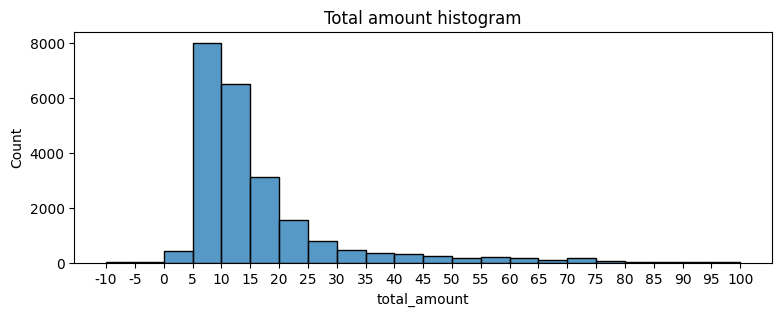

In [10]:
# Create histogram of total_amount
plt.figure(figsize=(9,3))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

In [11]:
five_to_fifteen = round(df[(df['total_amount']>=5) & (df['total_amount']<=15)].shape[0]*100/df.shape[0],2)
print(f"Percent of amounts falling in the $5-15 range: {five_to_fifteen}")

Percent of amounts falling in the $5-15 range: 64.0


**Note:** The total cost of each trip also has a distribution that skews right, with most costs (64%) falling in the $5-15 range.

**tip_amount**

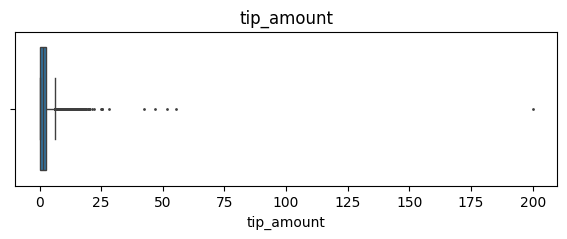

In [12]:
# Create box plot of tip_amount
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

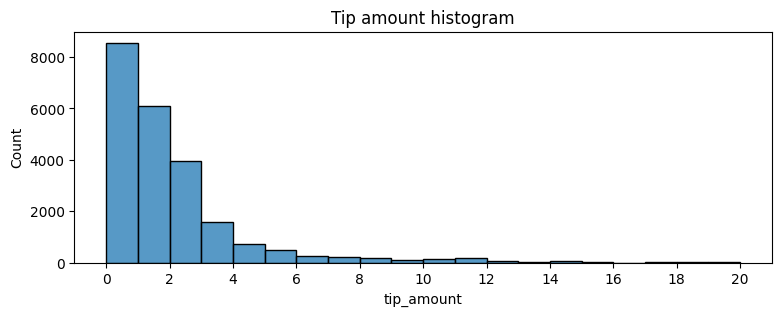

In [13]:
# Create histogram of tip_amount
plt.figure(figsize=(9, 3))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

In [14]:
zero_to_three = round(df[df['tip_amount']<=3].shape[0]*100/df.shape[0],2)
print(f"Percent of amounts falling in the $0-3 range: {zero_to_three}")

Percent of amounts falling in the $0-3 range: 83.12


**Note:** The distribution for tip amount is right-skewed, with 83% of the tips in the $0-3 range.

**tip_amount by vendor**

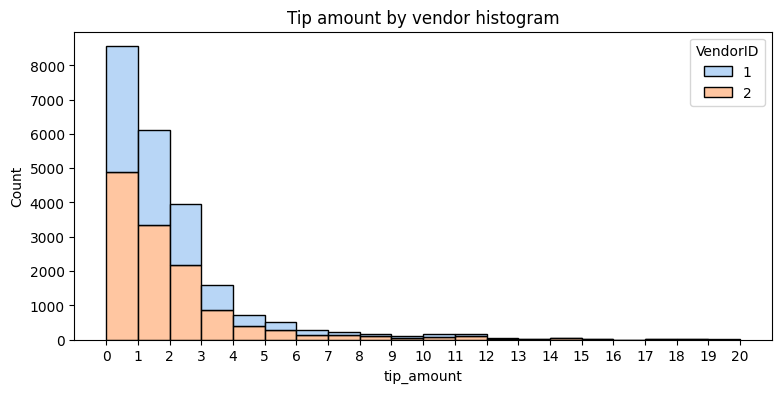

In [15]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(9, 4))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

**Note:** Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

Next, let's zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

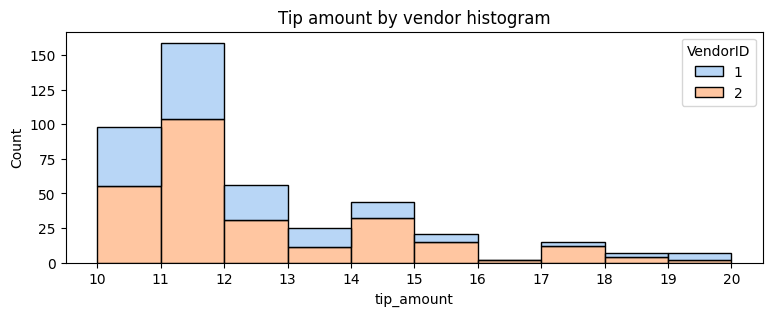

In [16]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(9, 3))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

**Note:** The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

**Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [17]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

**Note:** Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.

In [18]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df[['tip_amount', 'passenger_count']].groupby(['passenger_count']).mean()
mean_tips_by_passenger_count


,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


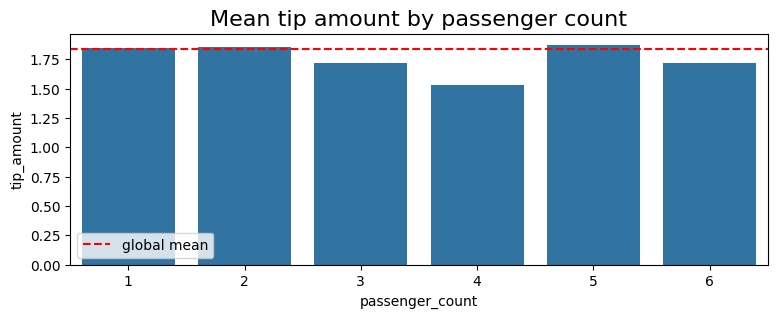

In [19]:
# Create bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(9, 3))
ax = sns.barplot(x=data.index,
            y=data['tip_amount'])
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16);

**Note:** Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

**Create month and day columns**

In [20]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

**Plot total ride count by month**

Begin by calculating total ride count by month.

In [21]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()

# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

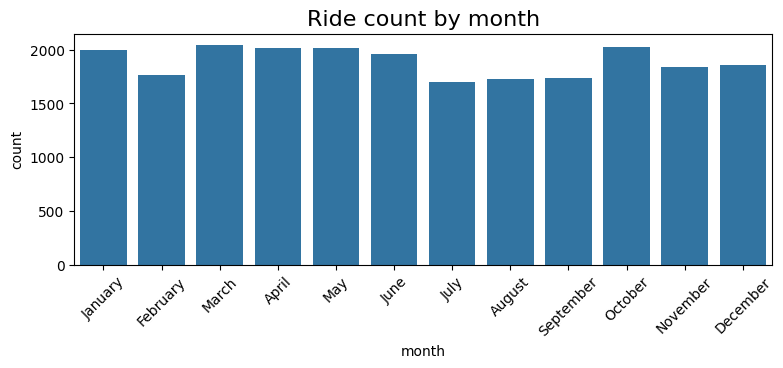

In [23]:
# Create a bar plot of total rides per month
plt.figure(figsize=(9, 3))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.xaxis.set_tick_params(labelsize=10, labelrotation=45)
plt.title('Ride count by month', fontsize=16);

**Note:** Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

In [24]:
# Repeat the above process, this time for rides by day
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

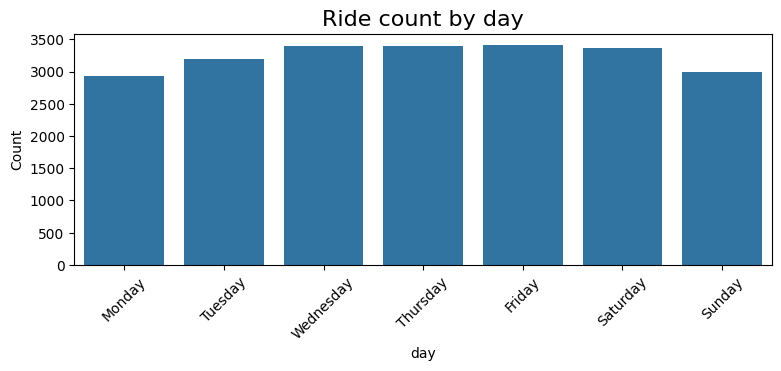

In [25]:
# Create bar plot for ride count by day
plt.figure(figsize=(9,3))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
# ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(labelsize=10, labelrotation=45)
plt.title('Ride count by day', fontsize=16);

**Note:** Suprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [26]:
# Repeat the process, this time for total revenue by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df[['day','total_amount']].groupby('day').sum()[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


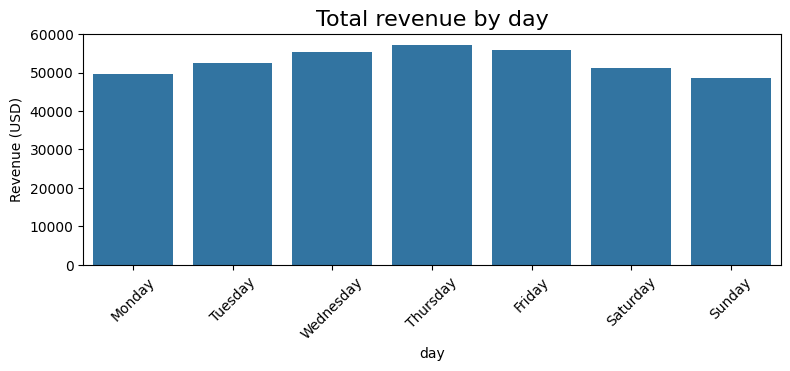

In [28]:
# Create bar plot of total revenue by day
plt.figure(figsize=(9, 3))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
# ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
ax.xaxis.set_tick_params(labelsize=10, labelrotation=45)
plt.title('Total revenue by day', fontsize=16);

**Note:** Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's&mdash;more than a 10% drop.

**Plot total revenue by month**

In [29]:
# Repeat the process, this time for total revenue by month
total_amount_month = df[['month','total_amount']].groupby('month').sum()[['total_amount']]
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


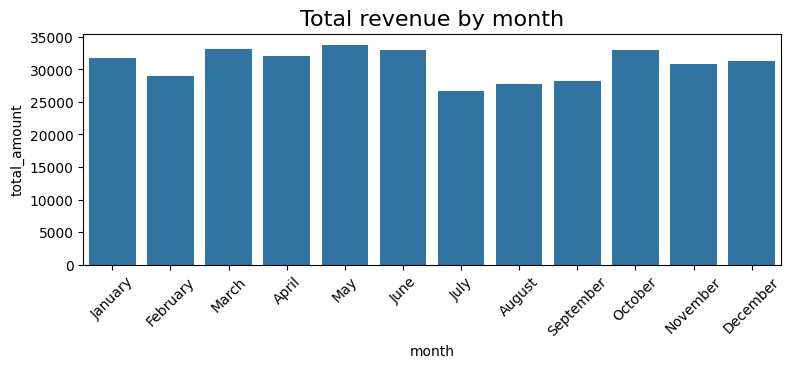

In [30]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(9,3))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
ax.xaxis.set_tick_params(labelsize=10, labelrotation=45)

plt.title('Total revenue by month', fontsize=16);

**Note:** Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

**Plot mean trip distance by drop-off location**

In [31]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [32]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df[['DOLocationID','trip_distance']].groupby('DOLocationID').mean()[['trip_distance']]

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff 

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


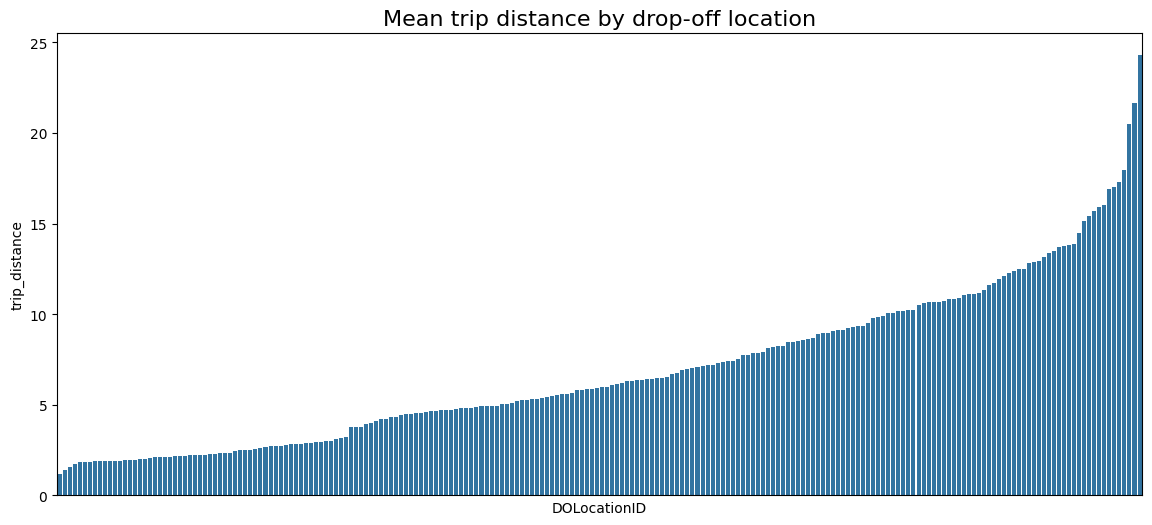

In [83]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

**Note:** This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations. 

To confirm this conclusion, we do the following experiment:
1. Create a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculate the distance between each pair of coordinates 
3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
4. Plot the mean distance for each unique endpoint

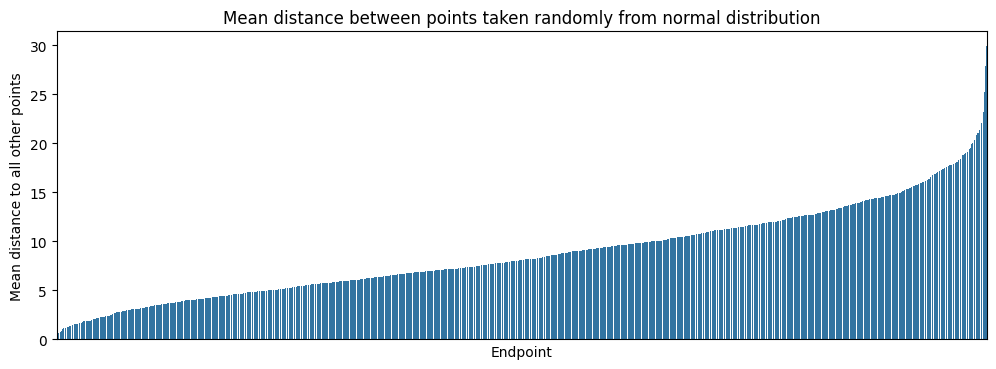

In [38]:
# 1. Generate random points on a 2D plane from a normal distribution
test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = int(len(test)/2)  # Calculate midpoint of the array of coordinates
start = test[:midway]      # Isolate first half of array ("pick-up locations")
end = test[midway:]        # Isolate second half of array ("drop-off locations")

# 2. Calculate Euclidean distances between points in first half and second half of array
distances = (start - end)**2           
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

# 3. Group the coordinates by "drop-off location", compute mean distance
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                   'end': [tuple(x) for x in end.tolist()],
                   'distance': distances})
data = test_df[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')
# data.head()
# # 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(12,4))
ax = sns.barplot(x=data.index.astype(str),
                 y=data['distance'])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution');

**Note:** The curve described by this graph is nearly identical to that of the mean distance traveled by each taxi ride to each drop-off location. This reveals that the drop-off locations in the taxi dataset are evenly distributed geographically. Note, however, that this does *not* mean that there was an even distrubtion of *rides* to each drop-off point. Examine this next.

**Histogram of rides by drop-off location**

First, let's check whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location. 

There are many ways to do this.

In [34]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

49

**Note:** There are 49 numbers that do not represent a drop-off location. 

To eliminate the spaces in the historgram that these missing numbers would create, we sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other. 

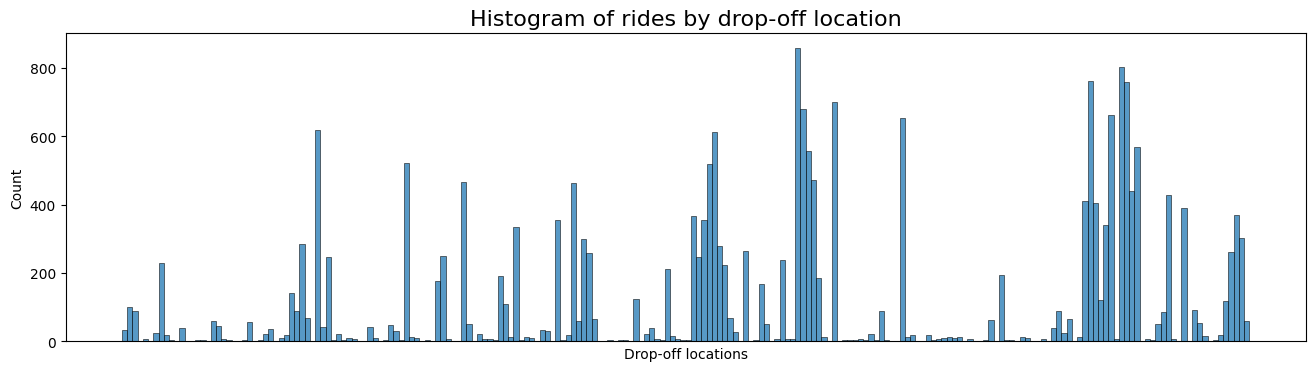

In [39]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

**Note:** Out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips. It's likely that these high-traffic locations are near popular tourist attractions like the Empire State Building or Times Square, airports, and train and bus terminals. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, this is not in the data.

<img src="images/Execute.png" width="100" height="100" align=center>

## PACE: Execute 
### Results and evaluation

Having built visualizations in Python, I have learned the highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. There are no missing values. 

My other questions are There are several trips that have a trip distance of "0.0." What might those trips be? Will they impact our model? 

My client would likely want to know that the data includes dropoff and pickup times. We can use that information to derive a trip duration for each line of data. This would likely be something that will help the client with their model.


In [40]:
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [41]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,March,Saturday,0 days 00:08:00
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,May,Wednesday,0 days 00:59:38
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,August,Tuesday,0 days 00:21:59
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,February,Saturday,0 days 00:12:07
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,November,Friday,0 days 00:20:26


### Conclusion

EDA helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.

Visualizations helped me understand that this dataset has some outliers that we will need to make decisions on prior to designing a model.
